# Задача классификации лидов (потенциальных покупателей)

## Информация

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating, etc. ) in order to get a higher lead conversion.

X Education wants to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score h have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Признаки

* Prospect ID - A unique ID with which the customer is identified.
* Lead Number - A lead number assigned to each lead procured.
* Lead Origin - The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
* Lead Source - The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
* Do Not Email -An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
* Do Not Call - An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
* Converted - The target variable. Indicates whether a lead has been successfully converted or not.
* TotalVisits - The total number of visits made by the customer on the website.
* Total Time Spent on Website - The total time spent by the customer on the website.
* Page Views Per Visit - Average number of pages on the website viewed during the visits.
* Last Activity - Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
* Country - The country of the customer.
* Specialization - The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
* How did you hear about X Education - The source from which the customer heard about X Education.
* What is your current occupation - Indicates whether the customer is a student, umemployed or employed.
* What matters most to you in choosing this course An option selected by the customer - indicating what is their main motto behind doing this course.
* Search - Indicating whether the customer had seen the ad in any of the listed items.
* Magazine
* Newspaper Article
* X Education Forums
* Newspaper
* Digital Advertisement
* Through Recommendations - Indicates whether the customer came in through recommendations.
* Receive More Updates About Our Courses - Indicates whether the customer chose to receive more updates about the courses.
* Tags - Tags assigned to customers indicating the current status of the lead.
* Lead Quality - Indicates the quality of lead based on the data and intuition the employee who has been assigned to the lead.
* Update me on Supply Chain Content - Indicates whether the customer wants updates on the Supply Chain Content.
* Get updates on DM Content - Indicates whether the customer wants updates on the DM Content.
* Lead Profile - A lead level assigned to each customer based on their profile.
* City - The city of the customer.
* Asymmetric Activity Index - An index and score assigned to each customer based on their activity and their profile
* Asymmetric Profile Index
* Asymmetric Activity Score
* Asymmetric Profile Score
* I agree to pay the amount through cheque - Indicates whether the customer has agreed to pay the amount through cheque or not.
* a free copy of Mastering The Interview - Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
* Last Notable Activity - The last notable activity performed by the student.


## Ссылки
* https://www.kaggle.com/amritachatterjee09/lead-scoring-dataset


## Импорт библиотек

In [145]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import warnings
warnings.filterwarnings('ignore') # Игнор ворнингов
import matplotlib.pyplot as plt # Научная графика
from matplotlib.pyplot import xticks
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
pd.set_option('display.max_columns', None)
import seaborn as sns           # Еще больше красивой графики для визуализации данных

# Алгоритмы машинного обучения
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn import svm
np.set_printoptions(suppress=True)

## Загружаем и проверяем данные

In [2]:
data = pd.read_csv('lead_scoring.csv')

Посмотрим на размеры таблицы:

In [3]:
data.shape

(9240, 37)

Первые пять строк таблицы:

In [4]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Последние пять строк таблицы:

In [5]:
data.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


Имеем следующие имена столбцов (признаков):

In [6]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Обработка данных

Смотрим есть ли строки с пустым значением целевой переменной:

In [9]:
data['Converted'].isnull().sum()

0

Таких строк нет.

In [10]:
sum(data.duplicated(subset='Prospect ID')) == 0

True

Следовательно, повторов нет.

Как можно заметить, в данных имеются значения `Select`, которые попросту означают, что пользователь не выбрал никакой ответ при заполнении формы. Заменяем `Select` на `np.nan`.

In [11]:
data = data.replace('Select', np.nan)

Посмотрим сколько пропущенных значений имеется в каждом столбце (в процентном соотношении):

In [12]:
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

In [13]:
data = data.drop(data.loc[:,list(round(100*(data.isnull().sum()/len(data.index)), 2)>70)].columns, 1)

### Lead Quality

In [14]:
data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

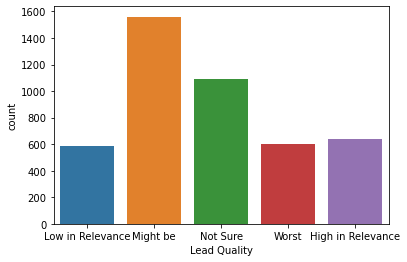

In [15]:
sns.countplot(data['Lead Quality'])

In [16]:
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')

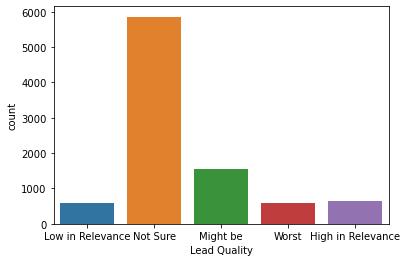

In [17]:
sns.countplot(data['Lead Quality'])

### Asymmetrique Activity Index, Asymmetrique Activity Score, Asymmetrique Profile Index, Asymmetrique Profile Score

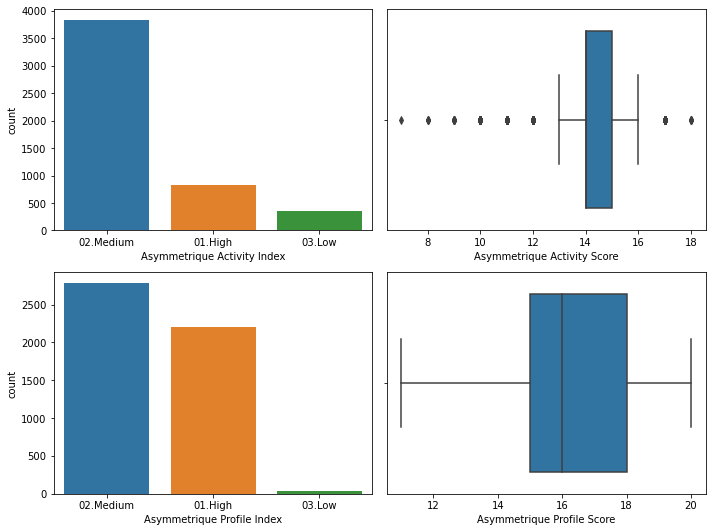

In [18]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(data['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(data['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(data['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(data['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

Для этих признаков характерна высокая вариативность, поэтому их нужно удалить. Кроме того, данные признаки формировались на основе субъективного мнения работников 'X Education'

In [19]:
data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1, inplace=True)

### Country

In [20]:
data.Country.value_counts(dropna=False, normalize=True)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
France                  0.000649
Oman                    0.000649
unknown                 0.000541
Germany                 0.000433
Kuwait                  0.000433
Nigeria                 0.000433
Canada                  0.000433
South Africa            0.000433
Sweden                  0.000325
Asia/Pacific Region     0.000216
Belgium                 0.000216
Philippines             0.000216
Uganda                  0.000216
Ghana                   0.000216
Netherlands             0.000216
Italy                   0.000216
Bangladesh              0.000216
China                   0.000216
Malaysia                0.000108
Denmark   

Так как 70% лидов поступают из Индии, можно предположить, что строки с NaN также относятся к Индии.

In [21]:
data['Country'].fillna('India', inplace=True)

### City

In [22]:
data.Country.value_counts(dropna=False, normalize=True)

India                   0.968939
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Nigeria                 0.000433
Canada                  0.000433
South Africa            0.000433
Kuwait                  0.000433
Germany                 0.000433
Sweden                  0.000325
Netherlands             0.000216
Uganda                  0.000216
China                   0.000216
Bangladesh              0.000216
Philippines             0.000216
Belgium                 0.000216
Ghana                   0.000216
Asia/Pacific Region     0.000216
Italy                   0.000216
Vietnam                 0.000108
Liberia                 0.000108
Indonesia 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

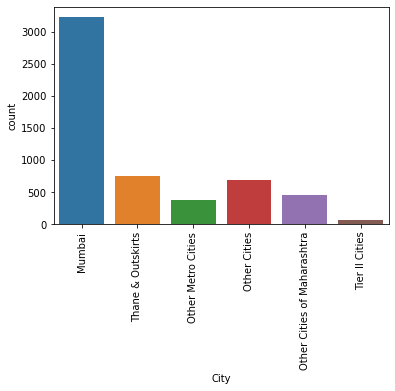

In [23]:
sns.countplot(data.City)
xticks(rotation = 90)

Присвоим Mumbai к строкам, где указана Индия как страна, но где отсутствует город.

In [24]:
condition_india = data['Country'] == 'India'
condition = (data['City'].isnull()) & condition_india
data.loc[condition,'City'] = 'Mumbai'

### Specialization

In [25]:
data.Specialization.value_counts(dropna=False, normalize=True)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

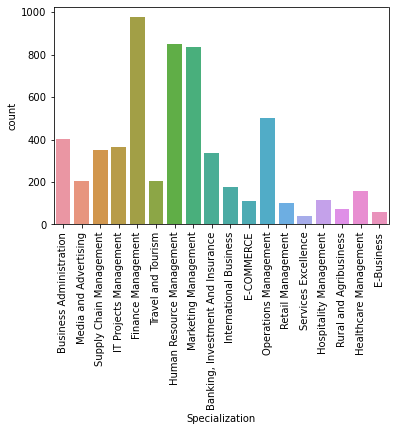

In [26]:
sns.countplot(data.Specialization)
xticks(rotation = 90)
pass

Присвоим значение Others к строчкам с NaN:

In [27]:
data['Specialization'].fillna('Others', inplace=True)

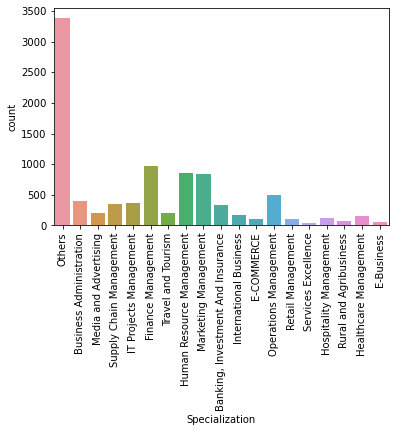

In [28]:
sns.countplot(data.Specialization)
xticks(rotation = 90)
pass

### Tags

In [29]:
data['Tags'].value_counts(dropna=False, normalize=True)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

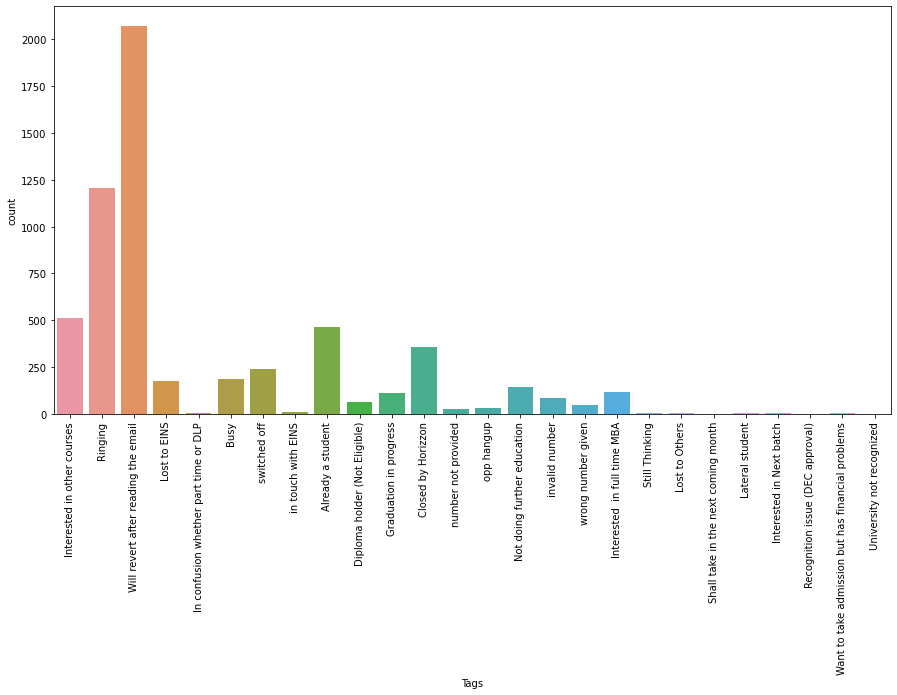

In [30]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(data.Tags)
xticks(rotation = 90)
pass

Заменим `NaN` на `Will revert after reading the email`, а также сгруппируем малые значения признака в `Others`:

In [31]:
data['Tags'].fillna('Will revert after reading the email', inplace=True)
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Others')

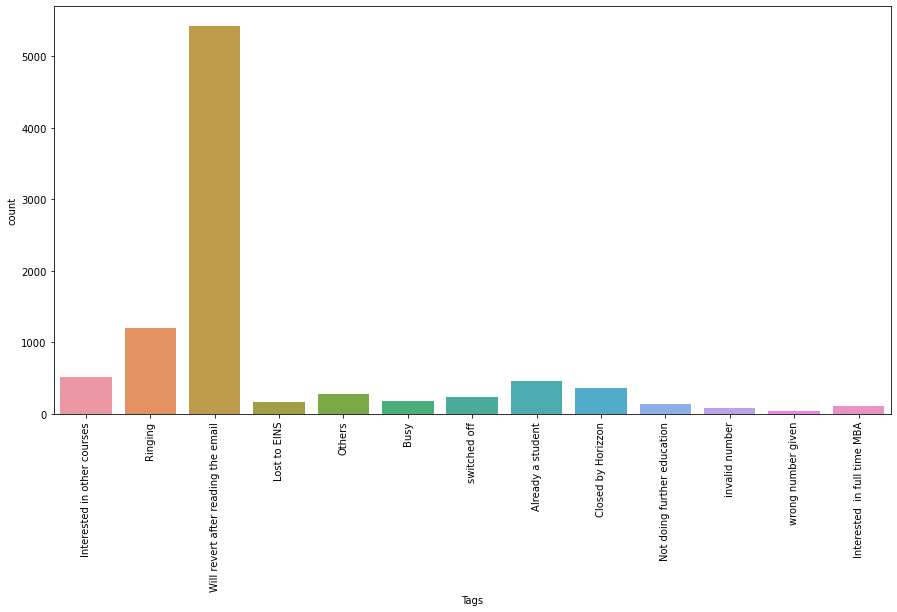

In [32]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(data.Tags)
xticks(rotation = 90)
pass

### What matters most to you in choosing a course

In [33]:
data['What matters most to you in choosing a course'].value_counts(dropna=False, normalize=True)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

Признак `What matters most to you in choosing a course` крайне однородный. Его нужно удалить.

In [34]:
data.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

### What is your current occupation

In [35]:
data['What is your current occupation'].value_counts(dropna=False, normalize=True)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [36]:
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

### Lead Origin

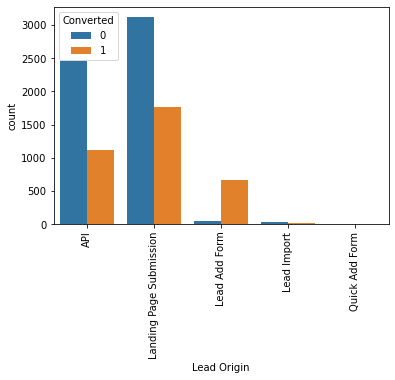

In [37]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = data)
xticks(rotation = 90)
pass

### Lead Source

In [38]:
data['Lead Source'].value_counts(dropna=False, normalize=True)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Live Chat            0.000216
Press_Release        0.000216
Social Media         0.000216
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
testone              0.000108
NC_EDM               0.000108
blog                 0.000108
youtubechannel       0.000108
Name: Lead Source, dtype: float64

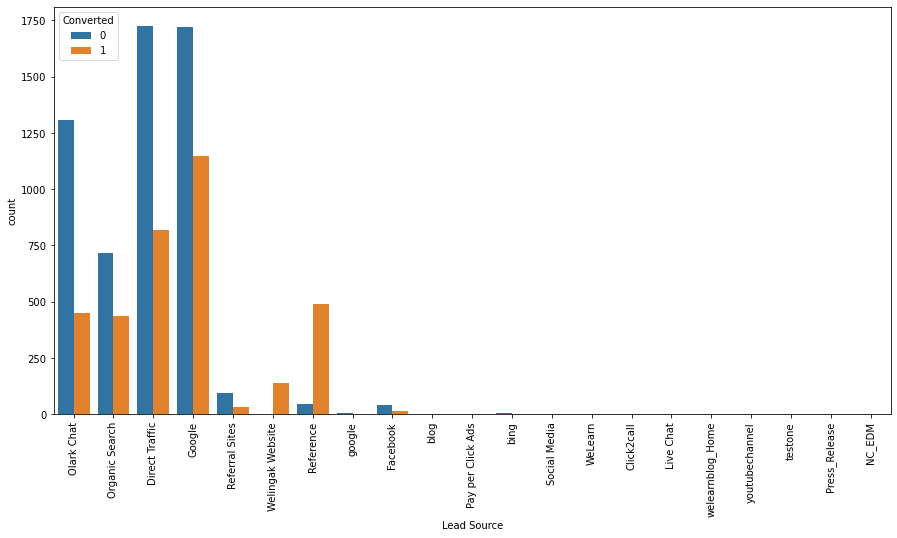

In [39]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)
pass

In [40]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

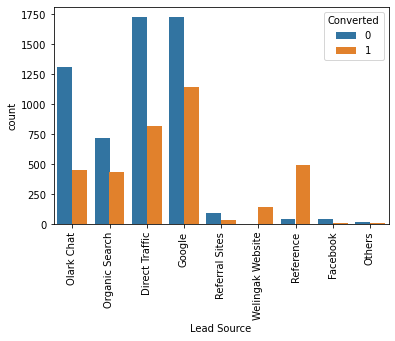

In [41]:
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)
pass

### Prospect ID, Lead Number

Признаки с уникальными значениями. Подлежат удалению.

In [42]:
data.drop(['Prospect ID', 'Lead Number'], axis=1, inplace=True)

In [43]:
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Last Activity                               1.11
City                                        0.65
Lead Source                                 0.39
Last Notable Activity                       0.00
Search                                      0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
Total Time Spent on Website                 0.00
Country                                     0.00
Specialization                              0.00
What is your current occupation             0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendati

### Search

In [44]:
data['Search'].value_counts(dropna=False, normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

Признак `Search` сильно однородный. Удаляем этот признак.

In [45]:
data.drop(['Search'], axis=1, inplace=True)

### Do Not Call

In [46]:
data['Do Not Call'].value_counts(dropna=False, normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

Признак `Do Not Call` сильно однородный. Удаляем этот признак.

In [47]:
data.drop(['Do Not Call'], axis=1, inplace=True)

### Country

In [48]:
data['Country'].value_counts(dropna=False, normalize=True)

India                   0.968939
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Nigeria                 0.000433
Canada                  0.000433
South Africa            0.000433
Kuwait                  0.000433
Germany                 0.000433
Sweden                  0.000325
Netherlands             0.000216
Uganda                  0.000216
China                   0.000216
Bangladesh              0.000216
Philippines             0.000216
Belgium                 0.000216
Ghana                   0.000216
Asia/Pacific Region     0.000216
Italy                   0.000216
Vietnam                 0.000108
Liberia                 0.000108
Indonesia 

Признак `Country` сильно однородный. Удаляем этот признак.

In [49]:
data.drop(['Country'], axis=1, inplace=True)

### A free copy of Mastering The Interview

In [50]:
data['A free copy of Mastering The Interview'].value_counts(dropna=False, normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

Признак `A free copy of Mastering The Interview` сильно однородный. Удаляем этот признак.

In [51]:
data.drop(['A free copy of Mastering The Interview'], axis=1, inplace=True)

### Newspaper

In [52]:
data['Newspaper'].value_counts(dropna=False, normalize=True)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

Признак `Newspaper` сильно однородный. Удаляем этот признак.

In [53]:
data.drop(['Newspaper'], axis=1, inplace=True)

### X Education Forums

In [54]:
data['X Education Forums'].value_counts(dropna=False, normalize=True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

Признак `X Education Forums` сильно однородный. Удаляем этот признак.

In [55]:
data.drop(['X Education Forums'], axis=1, inplace=True)

### Newspaper Article

In [56]:
data['Newspaper Article'].value_counts(dropna=False, normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

Признак `Newspaper Article` сильно однородный. Удаляем этот признак.

In [57]:
data.drop(['Newspaper Article'], axis=1, inplace=True)

### Magazine

In [58]:
data['Magazine'].value_counts(dropna=False, normalize=True)

No    1.0
Name: Magazine, dtype: float64

Признак `Magazine` сильно однородный. Удаляем этот признак.

In [59]:
data.drop(['Magazine'], axis=1, inplace=True)

### Digital Advertisement

In [60]:
data['Digital Advertisement'].value_counts(dropna=False, normalize=True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

Признак `Digital Advertisement` сильно однородный. Удаляем этот признак.

In [61]:
data.drop(['Digital Advertisement'], axis=1, inplace=True)

### Through Recommendations

In [62]:
data['Through Recommendations'].value_counts(dropna=False, normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

Признак `Through Recommendations` сильно однородный. Удаляем этот признак.

In [63]:
data.drop(['Through Recommendations'], axis=1, inplace=True)

### Receive More Updates About Our Courses

In [64]:
data['Receive More Updates About Our Courses'].value_counts(dropna=False, normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

Признак `Receive More Updates About Our Courses`. Удаляем этот признак.

In [65]:
data.drop(['Receive More Updates About Our Courses'], axis=1, inplace=True)

### Update me on Supply Chain Content

In [66]:
data['Update me on Supply Chain Content'].value_counts(dropna=False, normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

Признак `Update me on Supply Chain Content`. Удаляем этот признак.

In [67]:
data.drop(['Update me on Supply Chain Content'], axis=1, inplace=True)

### Get updates on DM Content

In [68]:
data['Get updates on DM Content'].value_counts(dropna=False, normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

Признак `Get updates on DM Content`. Удаляем этот признак.

In [69]:
data.drop(['Get updates on DM Content'], axis=1, inplace=True)

### I agree to pay the amount through cheque

In [70]:
data['I agree to pay the amount through cheque'].value_counts(dropna=False, normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

Признак `I agree to pay the amount through cheque`. Удаляем этот признак.

In [71]:
data.drop(['I agree to pay the amount through cheque'], axis=1, inplace=True)

### Total Visits

In [72]:
data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

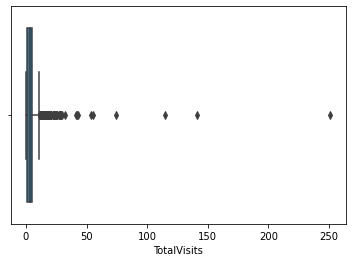

In [73]:
sns.boxplot(data['TotalVisits'])
pass

In [74]:
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

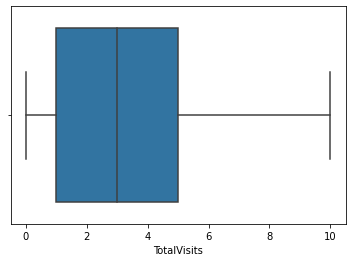

In [75]:
sns.boxplot(data['TotalVisits'])

### Total time spent on website

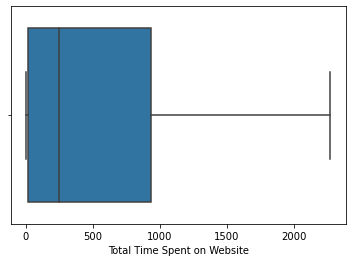

In [76]:
sns.boxplot(data['Total Time Spent on Website'])

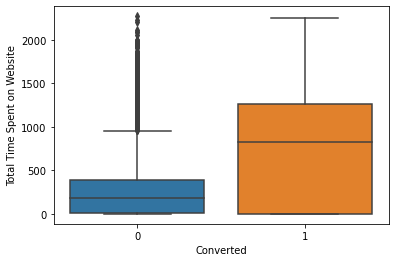

In [77]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

### Page views per visit

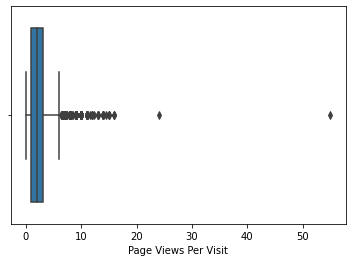

In [78]:
sns.boxplot(data['Page Views Per Visit'])

In [79]:
percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

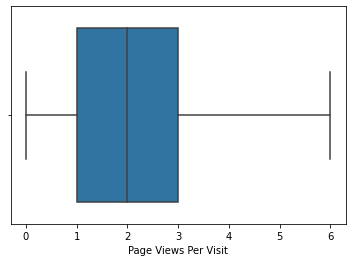

In [80]:
sns.boxplot(data['Page Views Per Visit'])
pass

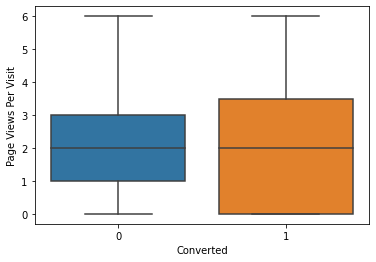

In [81]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)
pass

### Last Activity

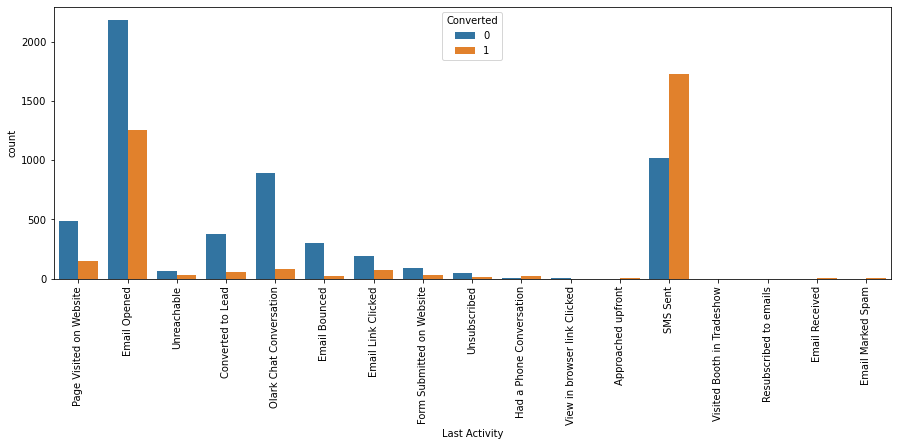

In [82]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)
pass

In [83]:
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

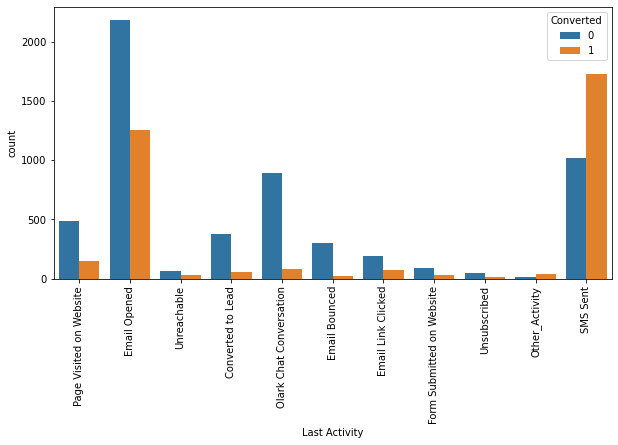

In [84]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)
pass

In [85]:
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)

Page Views Per Visit               1.48
TotalVisits                        1.48
Last Activity                      1.11
City                               0.65
Lead Source                        0.39
Last Notable Activity              0.00
Lead Quality                       0.00
Tags                               0.00
What is your current occupation    0.00
Specialization                     0.00
Total Time Spent on Website        0.00
Converted                          0.00
Do Not Email                       0.00
Lead Origin                        0.00
dtype: float64

Остальные строки с пропущенными значениями можно удалить.

In [86]:
data.dropna(inplace = True)

In [87]:
data.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.050643,0.358443,-0.000084
TotalVisits,0.050643,1.000000,0.363018,0.766923
Total Time Spent on Website,0.358443,0.363018,1.000000,0.366306
Page Views Per Visit,-0.000084,0.766923,0.366306,1.000000


## Бинаризация номинальных признаков

In [88]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [89]:
data.shape

(9014, 14)

In [90]:
dummies = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
data = pd.concat([data, dummies], axis=1)
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unem

In [91]:
data.drop(['Lead Origin',
           'Lead Source',
           'Last Activity',
           'Specialization',
           'What is your current occupation',
           'Tags',
           'Lead Quality',
           'City',
           'Last Notable Activity'], axis = 1, inplace=True)


In [92]:
data['Do Not Email'] = pd.factorize(data['Do Not Email'])[0]
# data['A free copy of Mastering The Interview'] = pd.factorize(data['A free copy of Mastering The Interview'])[0]

In [93]:
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Нормализация

## KNN

In [94]:
X = data.drop(['Converted'], axis=1)

In [95]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [96]:
X.shape

(9014, 84)

In [97]:
y = data['Converted']

In [98]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [100]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
neighbors = np.arange(1, 40)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

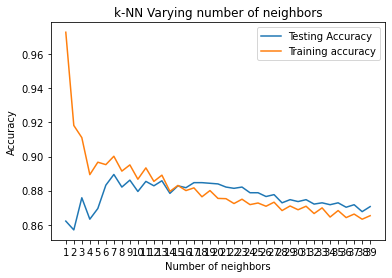

In [102]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0))
plt.show()

Можно увидеть, что при k = 17 точность тестовой выборки самая высокая. Создадим KNeighborsClassifier с числом соседей 17.

In [103]:
knn = KNeighborsClassifier(n_neighbors=17)

In [104]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

Посчитаем точность:

In [105]:
knn.score(X_test,y_test)

0.8846580406654344

#### Confusion matrix

In [106]:
y_pred = knn.predict(X_test)

In [107]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [108]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[1607,   71],
       [ 241,  786]], dtype=int64)

In [109]:
print('True negative =', conf_matrix[0][0])
print('False positive =', conf_matrix[0][1])
print('True positive =', conf_matrix[1][0])
print('False negative =', conf_matrix[1][1])

True negative = 1607
False positive = 71
True positive = 241
False negative = 786


#### Classification Report

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1678
           1       0.92      0.77      0.83      1027

    accuracy                           0.88      2705
   macro avg       0.89      0.86      0.87      2705
weighted avg       0.89      0.88      0.88      2705



#### ROC (Reciever Operating Charecteristic) curve

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

In [111]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [112]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

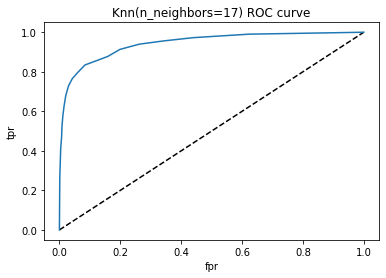

In [113]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=17) ROC curve')
plt.show()

Aread under ROC curve

In [114]:
roc_auc_score(y_test,y_pred_proba)

0.9432349797424253

#### Cross Validation

Now before getting into the details of Hyperparamter tuning, let us understand the concept of Cross validation.

The trained model's performance is dependent on way the data is split. It might not representative of the model’s ability to generalize.

The solution is cross validation.

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

#### Hyperparameter tuning

The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.

There is a better way of doing it which involves:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.

In case of classifier like knn the parameter to be tuned is n_neighbors

In [115]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [116]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [117]:
knn_cv.best_score_

0.8059671173275765

In [118]:
knn_cv.best_params_

{'n_neighbors': 31}

KNN достигает наилучшей точности при k = 31

## PCA

In [119]:
pca = PCA(n_components=40)

In [120]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [121]:
explained_variance = pca.explained_variance_ratio_

In [122]:
explained_variance

array([0.05601072, 0.04184309, 0.03572654, 0.03027491, 0.02550543,
       0.02404632, 0.0239768 , 0.02244915, 0.0219643 , 0.02047285,
       0.02010185, 0.01964213, 0.01878163, 0.01738642, 0.01562435,
       0.01515066, 0.01458439, 0.01405251, 0.01394799, 0.01389631,
       0.01373331, 0.01351008, 0.01342435, 0.01332533, 0.01328207,
       0.01321101, 0.01311075, 0.01296088, 0.0128104 , 0.01263511,
       0.0125642 , 0.01247088, 0.01241752, 0.012254  , 0.01224504,
       0.01205823, 0.01199614, 0.01197466, 0.01181574, 0.01158553])

In [123]:
variance = 0
components = 0

In [124]:
for ex in explained_variance:
    if variance < .7:
        components += 1
        variance += ex
    else:
        break


In [125]:
knn = KNeighborsClassifier(n_neighbors=17)

In [126]:
knn.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=17)

In [127]:
knn.score(X_test_pca,y_test)

0.888354898336414

In [129]:
y_pred = knn.predict(X_test_pca)

In [130]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [131]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[1611,   67],
       [ 235,  792]], dtype=int64)

In [132]:
print('True negative =', conf_matrix[0][0])
print('False positive =', conf_matrix[0][1])
print('True positive =', conf_matrix[1][0])
print('False negative =', conf_matrix[1][1])

True negative = 1611
False positive = 67
True positive = 235
False negative = 792


#### Classification Report

In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1678
           1       0.92      0.77      0.84      1027

    accuracy                           0.89      2705
   macro avg       0.90      0.87      0.88      2705
weighted avg       0.89      0.89      0.89      2705



#### ROC (Reciever Operating Charecteristic) curve

In [136]:
y_pred_proba = knn.predict_proba(X_test_pca)[:,1]

In [137]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

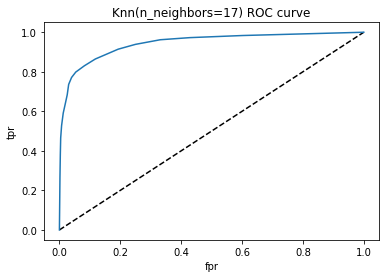

In [138]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=17) ROC curve')
plt.show()

In [139]:
roc_auc_score(y_test,y_pred_proba)

0.9441242588373742

## PCA

In [140]:
pca = PCA(n_components=2)

In [141]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [142]:
explained_variance = pca.explained_variance_ratio_

In [143]:
neighbors = np.arange(1, 6)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

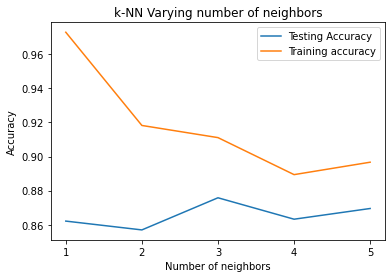

In [144]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0))
plt.show()

In [146]:
cls = svm.SVC(kernel='linear')

In [147]:
cls.fit(X_train_pca, y_train)

SVC(kernel='linear')

In [148]:
pred = cls.predict(X_test_pca)

In [151]:
print('accuracy:', metrics.accuracy_score(y_test, y_pred=pred))

accuracy: 0.82181146025878


In [152]:
print('precision', metrics.precision_score(y_test, y_pred=pred))

precision 0.8135788262370541


In [153]:
print('recall', metrics.recall_score(y_test, y_pred=pred))

recall 0.688412852969815


In [155]:
print(metrics.classification_report(y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1678
           1       0.81      0.69      0.75      1027

    accuracy                           0.82      2705
   macro avg       0.82      0.80      0.80      2705
weighted avg       0.82      0.82      0.82      2705

